# Electricity Price Prediction

In [226]:
import pandas as pd
import numpy as np
import warnings

# Load the data

file = (r'C:/Users/CA/Projects/Sandor_Time_Series_Forcasting/han/data_decoded(AutoRecovered).csv')

df = pd.read_csv(file)
df.head()

,ForecastIssueDateHourUTC,DeliveryStartUTC,target_var,product_type,auction_price,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption,predictor_var8^2,predictor_var8^3
0,2016-12-31T10:00:00Z,2016-12-31T23:00:00Z,42.88,1,20.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-31T10:00:00Z,2017-01-01T00:00:00Z,42.95,2,20.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-12-31T10:00:00Z,2017-01-01T01:00:00Z,41.66,3,18.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-12-31T10:00:00Z,2017-01-01T02:00:00Z,33.77,4,16.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-12-31T10:00:00Z,2017-01-01T03:00:00Z,37.65,5,16.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

In [84]:
df.describe().round()

,target_var,product_type,auction_price,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption,predictor_var8^2,predictor_var8^3
count,43823.0,43824.0,43824.0,43800.0,43800.0,43800.0,43752.0,43728.0,43800.0,4.380000e+04,4.380000e+04
mean,49.0,12.0,49.0,55207.0,4804.0,12887.0,25.0,22.0,37516.0,1.568870e+09,7.035164e+13
std,45.0,7.0,44.0,9557.0,7331.0,9944.0,17.0,20.0,12705.0,9.319734e+08,5.926229e+13
min,-445.0,1.0,-90.0,32886.0,0.0,92.0,4.0,4.0,-10698.0,3.830000e+02,-1.220000e+12
25%,30.0,7.0,30.0,47160.0,0.0,5150.0,13.0,14.0,29647.0,8.789333e+08,2.610000e+13
50%,40.0,12.0,40.0,54895.0,113.0,10145.0,23.0,18.0,38129.0,1.453808e+09,5.540000e+13
75%,54.0,18.0,54.0,63552.0,7723.0,18151.0,28.0,22.0,46251.0,2.139124e+09,9.890000e+13
max,911.0,24.0,620.0,86117.0,33394.0,46151.0,88.0,175.0,78322.0,6.134405e+09,4.800000e+14


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ForecastIssueDateHourUTC   43824 non-null  object 
 1   DeliveryStartUTC           43824 non-null  object 
 2   target_var                 43823 non-null  float64
 3   product_type               43824 non-null  int64  
 4   auction_price              43824 non-null  float64
 5   demand_forcast             43800 non-null  float64
 6   solar_production_forcast   43800 non-null  float64
 7   wind_production_forcast    43800 non-null  float64
 8   co2_price                  43752 non-null  float64
 9   natural_gas_price          43728 non-null  float64
 10  non_renewable_consumption  43800 non-null  float64
 11  predictor_var8^2           43800 non-null  float64
 12  predictor_var8^3           43800 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usa

### We need to convert DeliveryStartsUTC column to datatime format and set it to index for further analysis

In [127]:
# Convert time to datetime object and set it as index

df.drop(df.loc[df['DeliveryStartUTC'].duplicated()].index, inplace = True)
df['DeliveryStartUTC'] = pd.to_datetime(df['DeliveryStartUTC'], utc=True, infer_datetime_format=True)
df = df.set_index(['DeliveryStartUTC'])
df.head()

,ForecastIssueDateHourUTC,target_var,product_type,auction_price,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption,predictor_var8^2,predictor_var8^3
DeliveryStartUTC,,,,,,,,,,,,
2016-12-31 23:00:00+00:00,2016-12-31T10:00:00Z,42.88,1,20.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:00:00+00:00,2016-12-31T10:00:00Z,42.95,2,20.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00+00:00,2016-12-31T10:00:00Z,41.66,3,18.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00+00:00,2016-12-31T10:00:00Z,33.77,4,16.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00+00:00,2016-12-31T10:00:00Z,37.65,5,16.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AS we can see there is a lot of columns present in our data set that are not required at this moment and will only affect the model perfornmance, so better to drop extra columns.

In [128]:
## droping the columns that are not useful

df = df.drop(['ForecastIssueDateHourUTC','auction_price', 'product_type',
              'predictor_var8^2', 'predictor_var8^3'], axis=1)
df.head()

,target_var,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption
DeliveryStartUTC,,,,,,,
2016-12-31 23:00:00+00:00,42.88,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:00:00+00:00,42.95,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00+00:00,41.66,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00+00:00,33.77,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00+00:00,37.65,NaN,NaN,NaN,NaN,NaN,NaN


We can see there is a large amount of NaN values in our dataset so, we need to replace them with the mean of the column as it will create noise in the data.

In [129]:
df['target_var'] = df['target_var'].fillna(df['target_var'].mean())
df['demand_forcast'] = df['demand_forcast'].fillna(df['demand_forcast'].mean())
df['solar_production_forcast'] = df['solar_production_forcast'].fillna(df['solar_production_forcast'].mean())
df['wind_production_forcast'] = df['wind_production_forcast'].fillna(df['wind_production_forcast'].mean())
df['co2_price'] = df['co2_price'].fillna(df['co2_price'].mean())
df['natural_gas_price'] = df['natural_gas_price'].fillna(df['natural_gas_price'].mean())
df['non_renewable_consumption'] = df['non_renewable_consumption'].fillna(df['non_renewable_consumption'].mean())

In [130]:
# Let's check our data set once again

df.head()

,target_var,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption
DeliveryStartUTC,,,,,,,
2016-12-31 23:00:00+00:00,42.88,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083
2017-01-01 00:00:00+00:00,42.95,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083
2017-01-01 01:00:00+00:00,41.66,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083
2017-01-01 02:00:00+00:00,33.77,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083
2017-01-01 03:00:00+00:00,37.65,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083


In [110]:
# Find NaNs and duplicates in dataframe 'df'

print('There are {} missing values or NaNs in df.'
      .format(df.isnull().values.sum()))

temp = df.duplicated(keep='first').sum()

print('There are {} duplicate rows in df based on all columns.'
      .format(temp))

There are 0 missing values or NaNs in df.
There are 0 duplicate rows in df based on all columns.


### We need to start our analysis with first year. Here starting year is 2017 so, selecting data points from 2017-01-01 00:00:00 to 2017-12-31 23:00:00 as it will complete one year data. 

In [131]:
df = df.iloc[:8761]
df = df.iloc[1:]
df

,target_var,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption
DeliveryStartUTC,,,,,,,
2017-01-01 00:00:00+00:00,42.95,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083
2017-01-01 01:00:00+00:00,41.66,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083
2017-01-01 02:00:00+00:00,33.77,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083
2017-01-01 03:00:00+00:00,37.65,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083
2017-01-01 04:00:00+00:00,33.88,55206.791193,4803.733794,12887.083316,24.848974,22.182827,37515.974083
...,...,...,...,...,...,...,...
2017-12-31 19:00:00+00:00,22.49,46201.029250,0.000000,30158.350000,8.090000,19.307000,16042.679250
2017-12-31 20:00:00+00:00,6.32,43734.504750,0.000000,29640.800000,8.090000,19.307000,14093.704750
2017-12-31 21:00:00+00:00,-3.46,40748.666750,0.000000,29792.025000,8.090000,19.307000,10956.641750


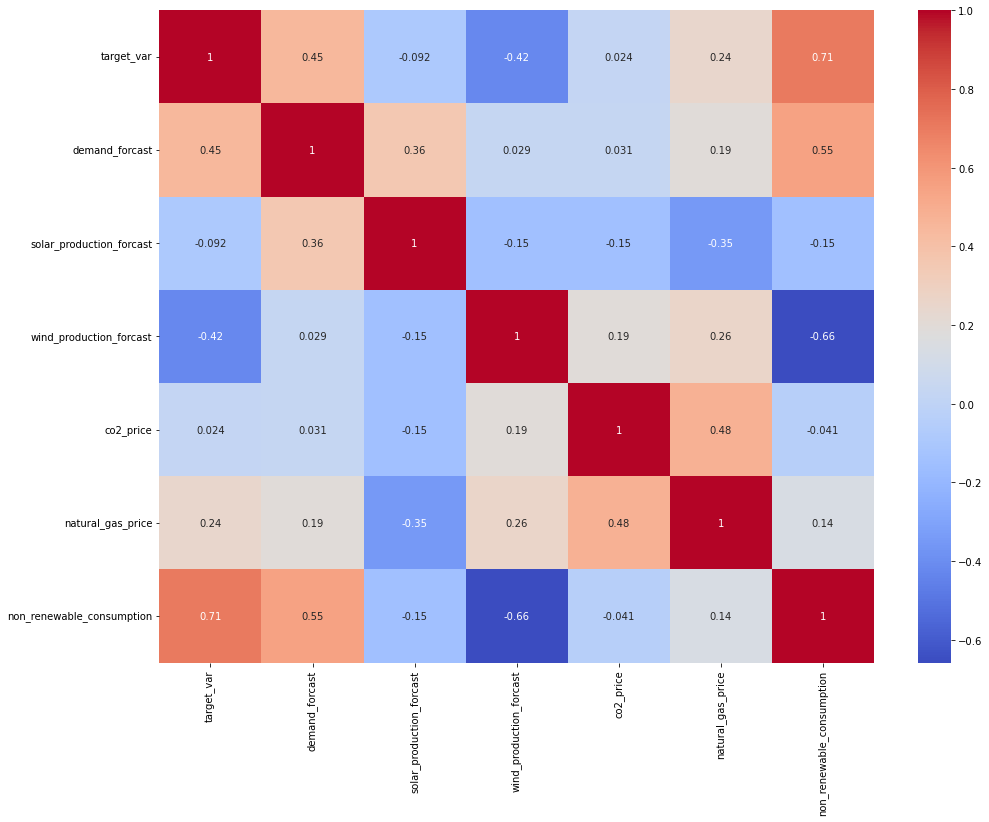

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

## Prediction Model
Now let’s move to the task of training a price prediction model. Here I will first add all the important features to x and the target column to y, and then I will split the data into training and test sets:

In [133]:
x = df[['demand_forcast','solar_production_forcast',
        'wind_production_forcast', 'co2_price',
        'natural_gas_price', 'non_renewable_consumption']]

y = df["target_var"]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.25, 
                                                random_state=42)

In [134]:
# Checking the shape of our data set 

print('Training Features Shape:', xtrain.shape)
print('Training Labels Shape:', ytrain.shape)
print('Testing Features Shape:', xtest.shape)
print('Testing Labels Shape:', ytest.shape)

Training Features Shape: (6570, 6)
Training Labels Shape: (6570,)
Testing Features Shape: (2190, 6)
Testing Labels Shape: (2190,)


As this is the problem of regression, so here I will choose the Random Forest regression algorithm to train the price prediction model:

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


## Define Grid 
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}


model = GridSearchCV(RandomForestRegressor(n_jobs=3), grid, cv=5, n_jobs=1)
fit = model.fit(xtrain, ytrain)


# Best Estimator
rf = fit.best_estimator_


### Let's predict the price.

In [136]:
y_pred = model.predict(xtest)
y_pred

array([ 30.32846865, -13.08227839,  36.3103674 , ...,  28.32466545,
        35.92213416,  58.95479793])

### Let’s check the difference between the actual and predicted values.

In [137]:
result=pd.DataFrame({'Actual':ytest, 'Predicted':y_pred})
result

,Actual,Predicted
DeliveryStartUTC,,
2017-09-10 08:00:00+00:00,25.70,30.328469
2017-08-20 12:00:00+00:00,-0.49,-13.082278
2017-09-07 14:00:00+00:00,35.25,36.310367
2017-11-16 18:00:00+00:00,77.91,44.918351
2017-05-19 07:00:00+00:00,37.94,39.631630
...,...,...
2017-02-17 01:00:00+00:00,30.47,28.614558
2017-06-29 19:00:00+00:00,31.89,31.550484
2017-09-08 08:00:00+00:00,27.45,28.324665


In [138]:
# Calculate the absolute errors
errors = abs(y_pred - ytest)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 76.69 %.


### For our use case we need to predict the prices for next two weeks we need to create an array with the values of next two weeks and then pass it to our model and see how our model perform with the new input

In [214]:
df_test = pd.read_csv(file)
df_test.head()

,ForecastIssueDateHourUTC,DeliveryStartUTC,target_var,product_type,auction_price,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption,predictor_var8^2,predictor_var8^3
0,2016-12-31T10:00:00Z,2016-12-31T23:00:00Z,42.88,1,20.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-31T10:00:00Z,2017-01-01T00:00:00Z,42.95,2,20.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-12-31T10:00:00Z,2017-01-01T01:00:00Z,41.66,3,18.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-12-31T10:00:00Z,2017-01-01T02:00:00Z,33.77,4,16.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-12-31T10:00:00Z,2017-01-01T03:00:00Z,37.65,5,16.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
# Convert time to datetime object and set it as index

df_test.drop(df_test.loc[df_test['DeliveryStartUTC'].duplicated()].index, inplace = True)
df_test['DeliveryStartUTC'] = pd.to_datetime(df_test['DeliveryStartUTC'], utc=True, infer_datetime_format=True)
df_test = df_test.set_index(['DeliveryStartUTC'])
df_test.head()

,ForecastIssueDateHourUTC,target_var,product_type,auction_price,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption,predictor_var8^2,predictor_var8^3
DeliveryStartUTC,,,,,,,,,,,,
2016-12-31 23:00:00+00:00,2016-12-31T10:00:00Z,42.88,1,20.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:00:00+00:00,2016-12-31T10:00:00Z,42.95,2,20.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00+00:00,2016-12-31T10:00:00Z,41.66,3,18.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00+00:00,2016-12-31T10:00:00Z,33.77,4,16.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00+00:00,2016-12-31T10:00:00Z,37.65,5,16.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
## droping the columns that are not useful

df_test = df_test.drop(['ForecastIssueDateHourUTC','auction_price', 'product_type',
                        'predictor_var8^2', 'predictor_var8^3'], axis=1)
df_test.head()

,target_var,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption
DeliveryStartUTC,,,,,,,
2016-12-31 23:00:00+00:00,42.88,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:00:00+00:00,42.95,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00+00:00,41.66,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00+00:00,33.77,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00+00:00,37.65,NaN,NaN,NaN,NaN,NaN,NaN


### Taking data points for the period of next two weeks ( i.e - from 2018-01-01 00:00:00 to 2018-01-14 23:00:00)

In [217]:
df_test = df_test.iloc[:9097]
df_test = df_test.iloc[8761:]
df_test

,target_var,demand_forcast,solar_production_forcast,wind_production_forcast,co2_price,natural_gas_price,non_renewable_consumption
DeliveryStartUTC,,,,,,,
2018-01-01 00:00:00+00:00,-3.98,39914.88225,0.0,32391.575,8.09,19.307,7523.30725
2018-01-01 01:00:00+00:00,-26.25,40776.70950,0.0,33824.450,8.09,19.307,6952.25950
2018-01-01 02:00:00+00:00,-31.41,43273.67125,0.0,35061.725,8.09,19.307,8211.94625
2018-01-01 03:00:00+00:00,-38.33,48211.34200,0.0,35912.175,8.09,19.307,12299.16700
2018-01-01 04:00:00+00:00,-44.01,54870.32350,0.0,36828.375,8.09,19.307,18041.94850
...,...,...,...,...,...,...,...
2018-01-14 19:00:00+00:00,29.51,51232.38275,0.0,17238.850,7.83,19.565,33993.53275
2018-01-14 20:00:00+00:00,31.38,50617.32975,0.0,17029.725,7.83,19.565,33587.60475
2018-01-14 21:00:00+00:00,29.37,47184.48700,0.0,16560.175,7.83,19.565,30624.31200


In [218]:
# convert dataframe to numpy array
arr = df_test[['demand_forcast', 'solar_production_forcast',
               'wind_production_forcast', 'co2_price',
               'natural_gas_price', 'non_renewable_consumption']].to_numpy()
print(arr)

[[3.99148823e+04 0.00000000e+00 3.23915750e+04 8.09000000e+00
  1.93070000e+01 7.52330725e+03]
 [4.07767095e+04 0.00000000e+00 3.38244500e+04 8.09000000e+00
  1.93070000e+01 6.95225950e+03]
 [4.32736712e+04 0.00000000e+00 3.50617250e+04 8.09000000e+00
  1.93070000e+01 8.21194625e+03]
 ...
 [4.71844870e+04 0.00000000e+00 1.65601750e+04 7.83000000e+00
  1.95650000e+01 3.06243120e+04]
 [4.46729072e+04 0.00000000e+00 1.58752750e+04 7.83000000e+00
  1.95650000e+01 2.87976322e+04]
 [4.29965563e+04 0.00000000e+00 1.83566000e+04 7.83000000e+00
  1.95650000e+01 2.46399562e+04]]


### Predicting the prices by passing new unseen data points to our model.

In [219]:
two_weeks = model.predict(arr)

In [220]:
result = two_weeks.tolist()

In [221]:
# Making a final Dataframe with predictions in it.

df_test['Predictions'] = result 
df_test = df_test.drop(['demand_forcast', 'solar_production_forcast',
                        'wind_production_forcast', 'natural_gas_price',
                         'co2_price', 'non_renewable_consumption'], axis=1)
df_test.head()

,target_var,Predictions
DeliveryStartUTC,,
2018-01-01 00:00:00+00:00,-3.98,-11.542608
2018-01-01 01:00:00+00:00,-26.25,-17.857237
2018-01-01 02:00:00+00:00,-31.41,-10.632107
2018-01-01 03:00:00+00:00,-38.33,-3.576420
2018-01-01 04:00:00+00:00,-44.01,3.879844


## Ploting Ling graph between target variable and Predicted values of our model

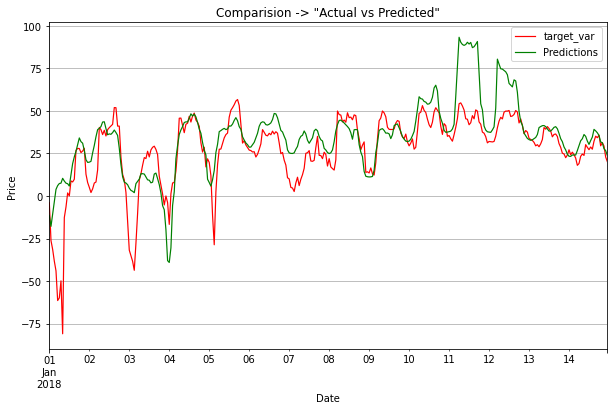

In [222]:
kwargs= dict (linestyle='solid', color=['red', 'green'], linewidth=1.2)
line_plot = df_test.plot( y = ['target_var', 'Predictions'], figsize= (10,6),**kwargs ) 
line_plot.set_title('Comparision -> "Actual vs Predicted"')
line_plot.grid()
line_plot.set_xlabel('Date')
line_plot.set_ylabel('Price');

## We got our model running and getting good prediction let's check our model perfornmance

In [223]:
# Calculate the absolute errors
errors = abs(df_test['target_var'] - df_test['Predictions'])

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / df_test['Predictions'])

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 41.19 %.


In [225]:
# Metrics
print('Best Params: ', fit.best_params_)
print('Best Score: ', fit.best_score_)
print( 'R2 Score: ', metrics.r2_score(ytest.values, y_pred))
print( 'Explained Variance Score: ', metrics.explained_variance_score(ytest.values, y_pred))
print( 'MAE: ', metrics.mean_absolute_error(ytest.values, y_pred))
print( 'MSE: ', metrics.mean_squared_error(ytest.values, y_pred))
print( 'Median AE: ', metrics.median_absolute_error(ytest.values, y_pred))

Best Params:  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 18}
Best Score:  0.7084998736542341
R2 Score:  0.7097757958116877
Explained Variance Score:  0.7099847158443753
MAE:  6.922996914935829
MSE:  113.6393641071221
Median AE:  4.777966770954395
